In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

In [3]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:

# Create SVM classifier (RBF kernel works well for non-linear data)
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [5]:
# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9722222222222222

📊 Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


🔹 Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


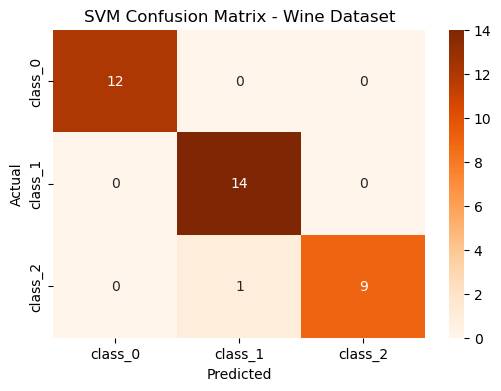

In [6]:
# Visualization of confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Oranges", fmt='d',
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix - Wine Dataset")
plt.show()